In [75]:
from transformers import pipeline
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
datapath = "../data/"
D_train= pd.read_csv(os.path.join(datapath, "challenge3/train.csv"))
D_test = pd.read_csv(os.path.join(datapath, "challenge3/submission.csv"))
# tokenizer 1=democrats, 0=Republican

In [25]:
classifier = pipeline('sentiment-analysis')
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = TFBertModel.from_pretrained('bert-base-uncased', return_dict=True)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertModel: ['classifier', 'dropout_19', 'pre_classifier']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Some layers from the model checkpoint at distilbert-b

In [26]:
# summarizer = pipeline('summarization')

In [27]:
# ner = pipeline("ner")

In [28]:
D_train.head()

,Unnamed: 0,Author,Body,Created,Post,Score,Subreddit,label,Body_Sentiment
0,0,BobSponge22,"Even when there's 0 active cases, they'll stil...",1589775859,Democrats Have Abandoned Civil Liberties,1,Republican,0,0.0
1,1,MsWumpkins,Yup. It's awful.,1585607566,"Donald Trump’s Briefing Snubbed, Critics No Lo...",2,democrats,1,0.0
2,2,mickey_patches,"I agree with what you say, more or less, but I...",1485285435,Top Republican Says Balancing The Budget As Im...,3,Republican,0,0.0
3,3,sdrawkcabemanresu11,No. [Source](https://www.govtrack.us/congress/...,1493234043,House GOP health bill changes exempt members o...,39,Republican,0,0.0
4,4,Mhunterjr,"Don't tell me which Rich, Racist, republic oli...",1581998270,Bloomberg is avoiding all scrutiny. It's time ...,4,democrats,1,0.0


# Pre-processing

In [29]:
D_train["label"] = LabelBinarizer().fit_transform(D_train["Subreddit"])

In [30]:
# tokens = tokenizer(D_train.Post.to_list())

In [31]:
D_train.Post[1]

'Donald Trump’s Briefing Snubbed, Critics No Longer Want To See POTUS’ Conferences'

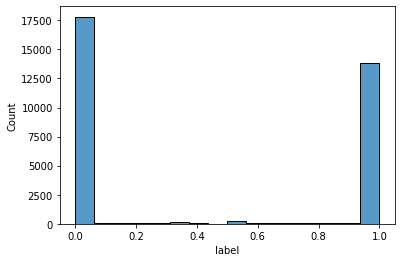

In [32]:
sns.histplot(D_train[["Author", "label"]].groupby(["Author"]).mean(), x="label")

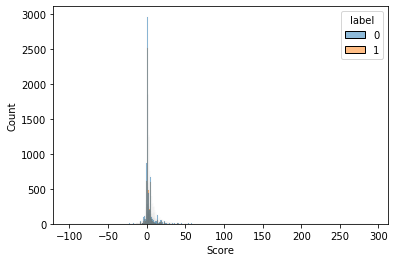

In [33]:
sns.histplot(D_train[["Author", "Score", "label"]].groupby(["Author", "label"]).mean(), x="Score", hue="label")

In [34]:
classifier(D_train.Post[15045])

[{'label': 'POSITIVE', 'score': 0.9973351359367371}]

In [35]:
D_train.Post[15045]

'Rihanna Hits Trump: ‘I’m Trying To Save The World, Unlike Y’all President’'

In [36]:
D_train.Subreddit[15045]

'Republican'

In [37]:
# author_train = D_train[["Author", "label"]].groupby("Author").mean()
author_train = set(D_train["Author"].unique())
author_test = set(D_test["Author"].unique())

In [38]:
unknown_authors = author_test.difference(author_train)
# unknown_authors

In [39]:
len(unknown_authors)

5784

In [40]:
len(author_train)

32706

In [41]:
len(D_train)

212052

In [42]:
len(D_test)

79707

In [50]:
author_map = D_train[["Author", "label"]].groupby("Author").mean()
unknown = pd.DataFrame.from_dict({key: [-1] for key in unknown_authors}).T
unknown.columns = ["label"]
author_map = pd.concat([author_map, unknown])

In [51]:
author_map = author_map.to_dict()["label"]
D_test["feature1"] = D_test["Author"].map(author_map)
D_train["feature1"] = D_train["Author"].map(author_map)


In [52]:
D_test["feature1"][D_test["feature1"].isna() == True] = -1
D_train["feature1"][D_train["feature1"].isna()] = -1
D_test.head()

/home/alexandre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alexandre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Author,Body,Created,Post,Score,feature1,Body_Sentiment
0,0,Picklesadog,And my argument is that the majority of democr...,1501799501,Poll: McCain more popular with Democrats than ...,1,0.0,0.0
1,1,NaN,I’m not necessarily disagreeing with you but d...,1590457879,Paying Illegal Immigrants Puts America Last,1,-1.0,0.0
2,2,Stunkstank,That’s not how the constitution works. Are you...,1523294396,Is Gun Ownership a Right?,1,0.0,0.0
3,3,viverator,Johnny five need input.,1587698971,“Senate Republicans slipped a tax break for we...,1,0.0,0.0
4,4,Broke_Poetry,Their jobs and pensions are being threatened o...,1598166788,Washington Postal Workers Defy USPS Orders And...,3,-1.0,0.0


In [46]:
D_train["Body_Sentiment"] = np.zeros(len(D_train))
D_test["Body_Sentiment"] = np.zeros(len(D_test))
D_train["Body_Sentiment"][D_train["Body"].isna()] = -1
D_test["Body_Sentiment"][D_test["Body"].isna()] = -1

/home/alexandre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alexandre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [47]:
# train_sentiment_data = D_train["Body"][~D_train["Body"].isna()].to_list()
# body_sentiment_train = []
# body_sentiment_test = []
# # train
# batch = len(D_train)//10000
# print(batch)
# for t in range(batch):
#     body_sentiment_train.append(classifier(train_sentiment_data[t * batch: (t + 1) * batch]))
#     print(t)
# body_sentiment_train = classifier()
# body_sentiment_test = classifier(D_train["Body"][~D_test["Body"].isna()].to_list())

In [66]:
X = D_train["feature1"].to_numpy()
Y = D_train["label"].to_numpy()
split=0.1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=split, random_state=42)

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train.reshape((-1, 1)), y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
logreg.score(X_train.reshape(-1, 1), y_train)
f1_score(logreg.predict(X_train.reshape(-1, 1)), y_train)

0.9098396033829105

In [77]:
f1_score(logreg.predict(X_test.reshape(-1, 1)), y_test)

0.9135404759430532

In [78]:
X_submission = D_test["feature1"].to_numpy().reshape(-1, 1)


In [85]:
pred = np.array([D_test.index.to_list(), logreg.predict(X_submission)]).T
pd.DataFrame(pred, columns=["id", "class"]).to_csv("SampleSubmission.csv", index=False)
